In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

c:\Users\jahon\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## Importação dos datasets

In [3]:
fga = pd.read_csv('NBA_22_23_FGA.csv', sep=';')
fga.head()

,PLAYER,PLAY TYPE,MADE,SHOT TYPE,BOXSCORE,VTM,HTM,Game Date,PERIOD,TIME REMAINING,SHOT DISTANCE (FT),TEAM
0,Marcus Smart,Driving Floating Bank Jump Shot,✔ Made Shot,2PT Field Goal,PHI @ BOS,PHI,BOS,"Tuesday, October 18",1,11:15,13,Boston Celtics
1,Jayson Tatum,Jump Shot,✔ Made Shot,3PT Field Goal,PHI @ BOS,PHI,BOS,"Tuesday, October 18",1,10:46,23,Boston Celtics
2,Derrick White,Running Layup Shot,✖ Missed Shot,2PT Field Goal,PHI @ BOS,PHI,BOS,"Tuesday, October 18",1,10:04,1,Boston Celtics
3,Al Horford,Cutting Layup Shot,✖ Missed Shot,2PT Field Goal,PHI @ BOS,PHI,BOS,"Tuesday, October 18",1,09:53,2,Boston Celtics
4,Jayson Tatum,Running Layup Shot,✔ Made Shot,2PT Field Goal,PHI @ BOS,PHI,BOS,"Tuesday, October 18",1,09:42,0,Boston Celtics


In [4]:
## Tabela com o nome, código e estatísticas de todos os time da NBA
cod_teams = pd.read_csv('cod_teams.csv', sep=';')
cod_teams.head()

,name,cod,W21_22,L21_22,blocks
0,Atlanta Hawks,ATL,43,39,348
1,Boston Celtics,BOS,51,31,478
2,Brooklyn Nets,BKN,44,38,448
3,Charlotte Hornets,CHA,43,39,402
4,Chicago Bulls,CHI,46,36,336


In [5]:
## Tabela com o nome, altura, peso e posição do draft de todos os jogadores da temporada 2022-2023 da NBA
info_players = pd.read_csv('players_info.csv', sep=',')
info_players = info_players.rename(columns={"Player": "PLAYER"})
info_players.head(10)

,PLAYER,Age,Height,Weight,DRAFT NUMBER
0,A.J. Lawson,22,6-6,179,Undrafted
1,AJ Green,23,6-5,190,Undrafted
2,AJ Griffin,19,6-6,220,16
3,Aaron Gordon,27,6-8,235,4
4,Aaron Holiday,26,6-0,185,23
5,Aaron Nesmith,23,6-5,215,14
6,Aaron Wiggins,24,6-5,190,55
7,Admiral Schofield,26,6-5,241,42
8,Al Horford,37,6-9,240,3
9,Alec Burks,31,6-6,214,12


## Tratamento dos datasets

### cod_teams

In [6]:
cod_teams['win_rate'] = cod_teams["W21_22"] / (cod_teams["W21_22"] + cod_teams["L21_22"])
cod_teams.drop(columns=['W21_22', 'L21_22'], inplace=True)
cod_teams.head()

,name,cod,blocks,win_rate
0,Atlanta Hawks,ATL,348,0.524390
1,Boston Celtics,BOS,478,0.621951
2,Brooklyn Nets,BKN,448,0.536585
3,Charlotte Hornets,CHA,402,0.524390
4,Chicago Bulls,CHI,336,0.560976


### info_players

In [7]:
## preencher valores nulos de DRAFT NUMBER com 100
info_players['DRAFT NUMBER'] = info_players['DRAFT NUMBER'].fillna(100)

## substituir "Undrafted" por 100
info_players['DRAFT NUMBER'] = info_players['DRAFT NUMBER'].replace('Undrafted', 100)

## converter DRAFT NUMBER para int
info_players['DRAFT NUMBER'] = info_players['DRAFT NUMBER'].astype(int)

info_players.head()

,PLAYER,Age,Height,Weight,DRAFT NUMBER
0,A.J. Lawson,22,6-6,179,100
1,AJ Green,23,6-5,190,100
2,AJ Griffin,19,6-6,220,16
3,Aaron Gordon,27,6-8,235,4
4,Aaron Holiday,26,6-0,185,23


In [8]:
## Transformar a coluna "Height" em centímetros, assumindo que 1 ft = 30.48 cm:
## Transformar a coluna "Weight" em quilos, assumindo que 1 kg = 2.20 libras

heights = []
weights = []

for i in range(len(info_players)):
    height = float(info_players['Height'][i].replace('-', '.')) * 30.48
    heights.append(height)
    weight = float(info_players['Weight'][i]) / 2.20
    weights.append(weight)

info_players['Height'] = heights
info_players['Weight'] = weights

info_players.head()

,PLAYER,Age,Height,Weight,DRAFT NUMBER
0,A.J. Lawson,22,201.168,81.363636,100
1,AJ Green,23,198.120,86.363636,100
2,AJ Griffin,19,201.168,100.000000,16
3,Aaron Gordon,27,207.264,106.818182,4
4,Aaron Holiday,26,182.880,84.090909,23


### fga

In [9]:
fga.head()

,PLAYER,PLAY TYPE,MADE,SHOT TYPE,BOXSCORE,VTM,HTM,Game Date,PERIOD,TIME REMAINING,SHOT DISTANCE (FT),TEAM
0,Marcus Smart,Driving Floating Bank Jump Shot,✔ Made Shot,2PT Field Goal,PHI @ BOS,PHI,BOS,"Tuesday, October 18",1,11:15,13,Boston Celtics
1,Jayson Tatum,Jump Shot,✔ Made Shot,3PT Field Goal,PHI @ BOS,PHI,BOS,"Tuesday, October 18",1,10:46,23,Boston Celtics
2,Derrick White,Running Layup Shot,✖ Missed Shot,2PT Field Goal,PHI @ BOS,PHI,BOS,"Tuesday, October 18",1,10:04,1,Boston Celtics
3,Al Horford,Cutting Layup Shot,✖ Missed Shot,2PT Field Goal,PHI @ BOS,PHI,BOS,"Tuesday, October 18",1,09:53,2,Boston Celtics
4,Jayson Tatum,Running Layup Shot,✔ Made Shot,2PT Field Goal,PHI @ BOS,PHI,BOS,"Tuesday, October 18",1,09:42,0,Boston Celtics


In [10]:
## 1) Substituir "✔ Made Shot" por 1 e "✘ Missed Shot" por 0

fga['MADE'] = fga['MADE'].replace('✔ Made Shot', 1)
fga['MADE'] = fga['MADE'].replace('✖ Missed Shot', 0)

In [11]:
## 2) Substituir "2PT Field Goal" por 2 e "3PT Field Goal" por 3

fga['SHOT TYPE'] = fga['SHOT TYPE'].replace('2PT Field Goal', 2)
fga['SHOT TYPE'] = fga['SHOT TYPE'].replace('3PT Field Goal', 3)

In [12]:
## 3) Retirar colunas descenessárias para o modelo

fga.drop('BOXSCORE', axis='columns', inplace=True)
fga.drop('Game\xa0Date', axis='columns', inplace=True)
fga.head()

,PLAYER,PLAY TYPE,MADE,SHOT TYPE,VTM,HTM,PERIOD,TIME REMAINING,SHOT DISTANCE (FT),TEAM
0,Marcus Smart,Driving Floating Bank Jump Shot,1,2,PHI,BOS,1,11:15,13,Boston Celtics
1,Jayson Tatum,Jump Shot,1,3,PHI,BOS,1,10:46,23,Boston Celtics
2,Derrick White,Running Layup Shot,0,2,PHI,BOS,1,10:04,1,Boston Celtics
3,Al Horford,Cutting Layup Shot,0,2,PHI,BOS,1,09:53,2,Boston Celtics
4,Jayson Tatum,Running Layup Shot,1,2,PHI,BOS,1,09:42,0,Boston Celtics


In [13]:
## 4) Criar uma coluna para identificar se o time que arremessou é mandante ou visitante da partida
## 5) Criar uma coluna para identificar a taxa de vitórias da temporada anterior
## 6) Transformar a coluna "TIME REMAINING" em segundos

is_home = []
owr = []
blocks = []
dwr = []
time_remaining = []
for i in range(len(fga)):
    # 4)
    if (cod_teams[cod_teams['name'] == fga['TEAM'][i]]["cod"].values[0]) == fga['HTM'][i]:
        is_home.append(1)
    else:
        is_home.append(0)
    
    # 5)
    owr.append(cod_teams[cod_teams['name'] == fga["TEAM"][i]]['win_rate'].values[0])

    # 6)
    time = fga['TIME REMAINING'][i].split(':')
    time_remaining.append(int(time[0])*60 + int(time[1]))


fga['is_home'] = is_home
fga['off_win_rate'] = owr
fga['TIME REMAINING'] = time_remaining

In [14]:
## 7) Criar uma coluna com o número de bloqueios da temporada anterior do time defensor
## 8) Criar uma coluna com o índice de vitórias do time defensor na temporada anterior

dwr = []
blocks = []
for i in range(len(fga)):
    if fga["is_home"][i] == 1:
        blocks.append(cod_teams[cod_teams['cod'] == fga["VTM"][i]]['blocks'].values[0])
        dwr.append(cod_teams[cod_teams['cod'] == fga["VTM"][i]]['win_rate'].values[0])
    else:
        blocks.append(cod_teams[cod_teams['cod'] == fga["HTM"][i]]['blocks'].values[0])
        dwr.append(cod_teams[cod_teams['cod'] == fga["HTM"][i]]['win_rate'].values[0])

fga['def_blocks'] = blocks
fga['def_win_rate'] = dwr

In [15]:
fga = fga.merge(info_players, on='PLAYER', how='inner')
fga.head()

,PLAYER,PLAY TYPE,MADE,SHOT TYPE,VTM,HTM,PERIOD,TIME REMAINING,SHOT DISTANCE (FT),TEAM,is_home,off_win_rate,def_blocks,def_win_rate,Age,Height,Weight,DRAFT NUMBER
0,Marcus Smart,Driving Floating Bank Jump Shot,1,2,PHI,BOS,1,675,13,Boston Celtics,1,0.621951,435,0.621951,29,195.072,100.0,6
1,Marcus Smart,Jump Shot,0,3,PHI,BOS,1,402,22,Boston Celtics,1,0.621951,435,0.621951,29,195.072,100.0,6
2,Marcus Smart,Driving Floating Jump Shot,0,2,PHI,BOS,1,205,6,Boston Celtics,1,0.621951,435,0.621951,29,195.072,100.0,6
3,Marcus Smart,Pullup Jump shot,1,2,PHI,BOS,2,453,9,Boston Celtics,1,0.621951,435,0.621951,29,195.072,100.0,6
4,Marcus Smart,Hook Shot,0,2,PHI,BOS,2,393,6,Boston Celtics,1,0.621951,435,0.621951,29,195.072,100.0,6


In [16]:
## Removendo colunas que não serão utilizadas no modelo
fga.drop('PLAYER', axis='columns', inplace=True)
fga.drop('PLAY TYPE', axis='columns', inplace=True)
fga.drop('HTM', axis='columns', inplace=True)
fga.drop('VTM', axis='columns', inplace=True)

fga.head()

,MADE,SHOT TYPE,PERIOD,TIME REMAINING,SHOT DISTANCE (FT),TEAM,is_home,off_win_rate,def_blocks,def_win_rate,Age,Height,Weight,DRAFT NUMBER
0,1,2,1,675,13,Boston Celtics,1,0.621951,435,0.621951,29,195.072,100.0,6
1,0,3,1,402,22,Boston Celtics,1,0.621951,435,0.621951,29,195.072,100.0,6
2,0,2,1,205,6,Boston Celtics,1,0.621951,435,0.621951,29,195.072,100.0,6
3,1,2,2,453,9,Boston Celtics,1,0.621951,435,0.621951,29,195.072,100.0,6
4,0,2,2,393,6,Boston Celtics,1,0.621951,435,0.621951,29,195.072,100.0,6


## Análise exploratória

In [17]:
import plotly.express as px

## Quais são os times que mais arriscam arremessos?

fig = px.bar(fga.value_counts('TEAM').head(5), x=fga.value_counts('TEAM').head(5).index, y=fga.value_counts('TEAM').head(5).values, title='Times que mais arriscam arremessos')
fig.update_layout(xaxis_title="Times", yaxis_title="Número de arremessos")
fig.update_yaxes(range=[7000, 8000])
fig.update_traces(texttemplate='%{value}', textposition='outside')
fig.show()


In [18]:
## E os que mais possuem arremessos convertidos?

fig = px.bar(fga[fga["MADE"] == 1].value_counts('TEAM').head(5), x=fga[fga["MADE"] == 1].value_counts('TEAM').head(5).index, y=fga[fga["MADE"] == 1].value_counts('TEAM').head(5).values, title='Times que mais possuem arremessos convertidos')
fig.update_layout(xaxis_title="Times", yaxis_title="Número de arremessos convertidos")
fig.update_yaxes(range=[3000, 4000])
fig.update_traces(texttemplate='%{value}', textposition='outside')
fig.show()

In [19]:
## E os que menos possuem arremessos convertidos?

fig = px.bar(fga[fga["MADE"] == 1].value_counts('TEAM').tail(5), x=fga[fga["MADE"] == 1].value_counts('TEAM').tail(5).index, y=fga[fga["MADE"] == 1].value_counts('TEAM').tail(5).values, title='Times que mais possuem arremessos convertidos')
fig.update_layout(xaxis_title="Times", yaxis_title="Número de arremessos convertidos")
fig.update_yaxes(range=[3000, 4000])
fig.update_traces(texttemplate='%{value}', textposition='outside')
fig.show()

In [20]:
fga

,MADE,SHOT TYPE,PERIOD,TIME REMAINING,SHOT DISTANCE (FT),TEAM,is_home,off_win_rate,def_blocks,def_win_rate,Age,Height,Weight,DRAFT NUMBER
0,1,2,1,675,13,Boston Celtics,1,0.621951,435,0.621951,29,195.072,100.000000,6
1,0,3,1,402,22,Boston Celtics,1,0.621951,435,0.621951,29,195.072,100.000000,6
2,0,2,1,205,6,Boston Celtics,1,0.621951,435,0.621951,29,195.072,100.000000,6
3,1,2,2,453,9,Boston Celtics,1,0.621951,435,0.621951,29,195.072,100.000000,6
4,0,2,2,393,6,Boston Celtics,1,0.621951,435,0.621951,29,195.072,100.000000,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209621,1,2,1,189,13,New Orleans Pelicans,0,0.439024,460,0.560976,29,201.168,90.909091,40
209622,0,3,2,614,24,New Orleans Pelicans,0,0.439024,460,0.560976,29,201.168,90.909091,40
209623,0,2,2,225,7,New Orleans Pelicans,0,0.439024,460,0.560976,29,201.168,90.909091,40
209624,0,2,4,640,8,New Orleans Pelicans,0,0.439024,460,0.560976,29,201.168,90.909091,40


In [21]:
## Quais são os times com maior taxa de acerto nos arremessos?

fig = px.bar((fga[fga["MADE"] == 1].value_counts('TEAM') / fga.value_counts('TEAM')).sort_values(ascending=False).head(5).index, y=(fga[fga["MADE"] == 1].value_counts('TEAM') / fga.value_counts('TEAM')).sort_values(ascending=False).head(5).values, title='Times com maior taxa de arremessos convertidos')
fig.update_layout(xaxis_title="Times", yaxis_title="Taxa de arremessos convertidos")
fig.update_yaxes(range=[0.45, 0.55])
fig.update_traces(texttemplate='%{value:.2%}', textposition='outside')
fig.show()

In [22]:
## Quais são os times com maior taxa de erro nos arremessos?

fig = px.bar((fga[fga["MADE"] == 0].value_counts('TEAM') / fga.value_counts('TEAM')).sort_values(ascending=False).head(5).index, y=(fga[fga["MADE"] == 0].value_counts('TEAM') / fga.value_counts('TEAM')).sort_values(ascending=False).head(5).values, title='Times com maior taxa de arremessos convertidos')
fig.update_layout(xaxis_title="Times", yaxis_title="Taxa de arremessos convertidos")
fig.update_yaxes(range=[0.5, 0.55])
fig.update_traces(texttemplate='%{value:.2%}', textposition='outside')
fig.show()

In [36]:
## Percentual de arremessos convertidos e não convertidos

labels = ['Arremessos convertidos', 'Arremessos não convertidos']
values = [fga['MADE'].value_counts()[1], fga['MADE'].value_counts()[0]]

fig = px.pie(fga, values=values, names=labels, title='Percentual de arremessos convertidos e não convertidos')
fig.update_traces(textposition='inside', textinfo='percent')
fig.update_traces(marker=dict(colors=['red', 'blue']))
fig.show()

In [23]:
## Hora de retirar a coluna "TEAM", ela não tem mais uso daqui em diante
fga.drop('TEAM', axis='columns', inplace=True)

## Dataset após a análise exploratória e tratamento dos dados

In [24]:
print(f"Shape: {fga.shape}")
fga.head()

Shape: (209626, 13)


,MADE,SHOT TYPE,PERIOD,TIME REMAINING,SHOT DISTANCE (FT),is_home,off_win_rate,def_blocks,def_win_rate,Age,Height,Weight,DRAFT NUMBER
0,1,2,1,675,13,1,0.621951,435,0.621951,29,195.072,100.0,6
1,0,3,1,402,22,1,0.621951,435,0.621951,29,195.072,100.0,6
2,0,2,1,205,6,1,0.621951,435,0.621951,29,195.072,100.0,6
3,1,2,2,453,9,1,0.621951,435,0.621951,29,195.072,100.0,6
4,0,2,2,393,6,1,0.621951,435,0.621951,29,195.072,100.0,6


### Matriz de correlação

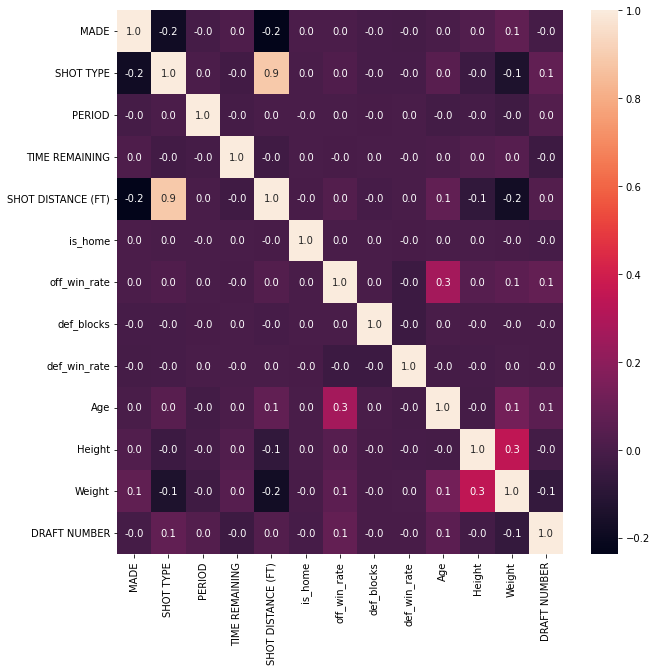

In [25]:
plt.figure(figsize=(10,10))
sns.heatmap(fga.corr(), annot=True, fmt='.1f')
plt.show()

### Salva o dataset tratado num arquivo csv

In [26]:
fga.to_csv('dados.csv', index=False)

In [27]:
fga.head()

,MADE,SHOT TYPE,PERIOD,TIME REMAINING,SHOT DISTANCE (FT),is_home,off_win_rate,def_blocks,def_win_rate,Age,Height,Weight,DRAFT NUMBER
0,1,2,1,675,13,1,0.621951,435,0.621951,29,195.072,100.0,6
1,0,3,1,402,22,1,0.621951,435,0.621951,29,195.072,100.0,6
2,0,2,1,205,6,1,0.621951,435,0.621951,29,195.072,100.0,6
3,1,2,2,453,9,1,0.621951,435,0.621951,29,195.072,100.0,6
4,0,2,2,393,6,1,0.621951,435,0.621951,29,195.072,100.0,6
